In [1]:
import numpy as np

In [2]:
!ls ../data

movie.mkv  movie.mp3


In [3]:
%%bash
cd ../data
find . -type f -name "*.mkv" \
    -exec bash -c 'FILE="$1"; ffmpeg -i "${FILE}" -vn -c:a libmp3lame -y "${FILE%.mkv}.mp3";' _ '{}' \;

ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

In [4]:
!ls ../data

movie.mkv  movie.mp3


In [5]:
import IPython.display as ipd

In [6]:
!ls ../data

movie.mkv  movie.mp3


In [ ]:
ipd.Audio('../data/movie.mp3')

In [8]:
import pydub
import librosa

In [9]:
audio_track = pydub.AudioSegment.from_mp3('../data/movie.mp3')

In [10]:
len(audio_track)

2860832

In [11]:
len(audio_track) / 1000 / 60

47.68053333333333

In [12]:
segment = audio_track[27 * 1000 * 60:29.5* 1000 * 60]

In [13]:
audio_track.channels

2

In [14]:
import numpy as np

In [15]:
type(segment)

pydub.audio_segment.AudioSegment

This function is based on a reply from [this github issue](https://github.com/jiaaro/pydub/issues/165)

In [16]:
def split_to_channels(sound: pydub.audio_segment.AudioSegment):
    samples = sound.get_array_of_samples()
    mono_channels = []

    for i in range(sound.channels):
        samples_for_current_channel = samples[i::sound.channels]

        try:
            mono_data = samples_for_current_channel.tobytes()
        except AttributeError:
            mono_data = samples_for_current_channel.tostring()

        mono_channels.append(
            sound._spawn(mono_data, overrides={"channels": 1})
        )
    return mono_channels

In [17]:
mono_segments = split_to_channels(segment)

In [18]:
def get_array(sound: pydub.audio_segment.AudioSegment):
    return np.array(sound.get_array_of_samples())

In [19]:
mono_segments_arrays = [
    get_array(seg)
    for seg in mono_segments
]

In [20]:
import matplotlib.pyplot as plt

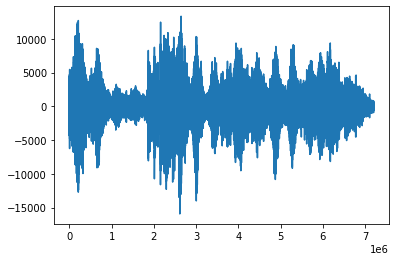

In [21]:
plt.plot(mono_segments_arrays[0] - mono_segments_arrays[1])

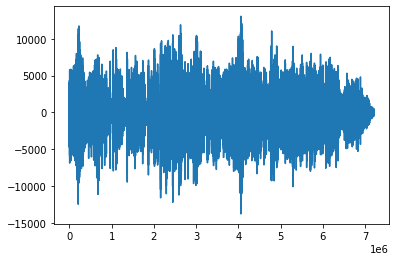

In [22]:
plt.plot(mono_segments_arrays[0])

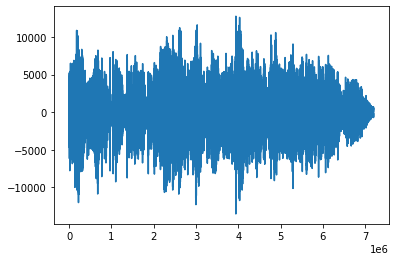

In [23]:
plt.plot(mono_segments_arrays[1])

In [25]:
import matplotlib.pyplot as plt

In [26]:
from sklearn import decomposition

In [27]:
ica = decomposition.FastICA(n_components=2)

In [74]:
signals = np.array(mono_segments_arrays).T

In [75]:
from sklearn import preprocessing

standardized_signals = preprocessing.StandardScaler().fit_transform(signals)

In [76]:
segment.frame_rate

48000

In [78]:
%%time
separated_signals = ica.fit_transform(standardized_signals[:segment.frame_rate * 5])

CPU times: user 139 ms, sys: 435 ms, total: 573 ms
Wall time: 24.3 ms


In [79]:
separated_signals.shape

(240000, 2)

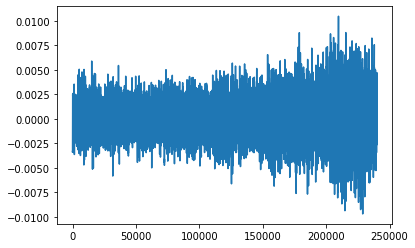

In [80]:
plt.plot(separated_signals[:,0])

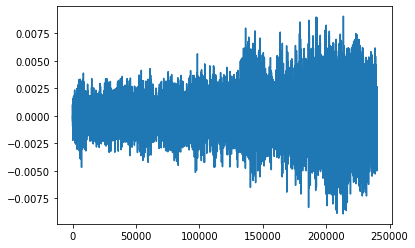

In [81]:
plt.plot(separated_signals[:,1])

In [82]:
ipd.Audio(data=separated_signals[:,0], rate=segment.frame_rate)

In [84]:
ipd.Audio(data=separated_signals[:,1], rate=segment.frame_rate)